In [5]:
import numpy as np
import time as t
import pandas as pd
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from scipy import special as sp
from Sampling import reject_sample
from Sampling import SIR
from Sampling import phi
from Sampling import g
from Sampling import h

**REJECTION SAMPLING**

time taken = 0.3927 s


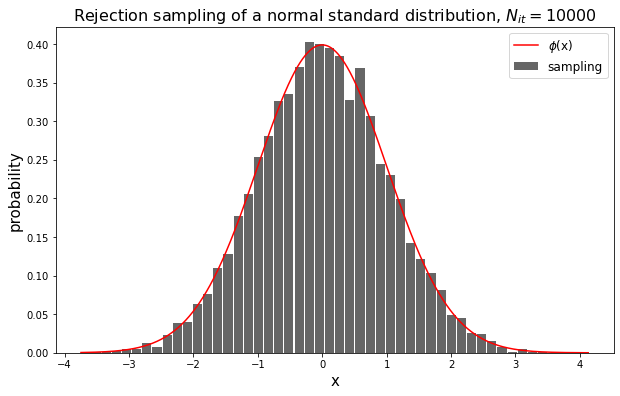

In [2]:
plt.figure(figsize=(10,6))
N_it = 10000
Xs = reject_sample(N_it)
xs = np.linspace(min(Xs), max(Xs), 10000)
ys = phi(xs)
plt.hist(Xs, bins = 50, density = True, label = 'sampling', rwidth=0.9, color = 'black', alpha = 0.6)
plt.plot(xs, ys, label = r'$\phi$'+'(x)', color = 'red')
plt.xlabel('x', size=15)
plt.ylabel('probability', size = 15)
plt.legend(fontsize=12)
plt.title('Rejection sampling of a normal standard distribution, '+r'$N_{it} = $'+'%.f'%N_it, size = 16)
plt.savefig('Reject_histo.pdf')

**SIR - SAMPLE IMPORTANCE RESEMPLE**

time taken = 26.7071 s


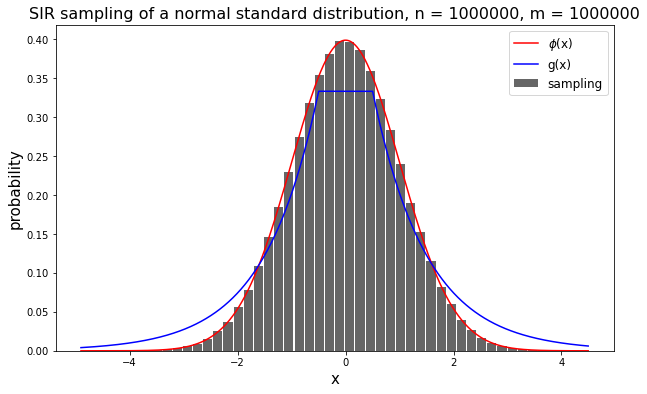

In [3]:
plt.figure(figsize=(10,6))
n = 1000000
m = 1000000
Xs = SIR(n, m)
xs = np.linspace(min(Xs), max(Xs), 10000)
ys = phi(xs)
plt.hist(Xs, bins = 50, density = True, label = 'sampling', rwidth=0.9, color = 'black', alpha = 0.6)
plt.plot(xs, ys, label = r'$\phi$'+'(x)', color = 'red')
plt.plot(xs, g(xs), label = 'g(x)', color = 'blue')
plt.xlabel('x', size=15)
plt.ylabel('probability', size = 15)
plt.legend(fontsize=12)
plt.title('SIR sampling of a normal standard distribution, n = %.f'%n+', m = %.f'%m, size = 16)
plt.savefig('SIR_histo.pdf')

In [6]:
E_sir, E_rej = [], []
N_it = 1000
for i in range(100):
    Xs_rej = reject_sample (N_it, pri = False)
    Xs_sir = SIR(N_it, N_it*100, pri = False)
    E_rej.append(np.average(h(Xs_rej)))
    E_sir.append(np.average(h(Xs_sir)))

print('reject algorithm mean value of E(h(x)) = %.10f'%np.mean(E_rej))
print('reject algorithm std deviation on E(h(x)) = %.10f'%np.std(E_rej))
print('SIR algorithm mean value of E(h(x)) = %.10f'%np.mean(E_sir))
print('SIR algorithm std deviation on E(h(x)) = %.10f'%np.std(E_sir))

KeyboardInterrupt: 